In [1]:
cd ../src

/home/richard/Desktop/software/epicluster-results_upload/epicluster-results/src


In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic4_lownoise.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

inf_cases = np.concatenate([past_cases, cases])


# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/supp_synthetic_1_R.csv')

# save results
results_synth1 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=40.98293584589077
Iter=100, Rhat=16.046681681282386
Iter=150, Rhat=6.3095336865474225
Iter=200, Rhat=3.3896392317474113
Iter=250, Rhat=1.8590735335545567
Iter=300, Rhat=1.2265264618357417
Iter=350, Rhat=1.0259409806501285
Iter=400, Rhat=1.0243301808728331
Iter=450, Rhat=1.0153070478587731
Iter=500, Rhat=1.0261021995757678
Iter=550, Rhat=1.0082364066678606
Converged 550 1.0082364066678606


In [5]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic5_highnoise.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

inf_cases = np.concatenate([past_cases, cases])


# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/supp_synthetic_2_R.csv')

# save results
results_synth2 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=30.772619429328063
Iter=100, Rhat=15.432925309261327
Iter=150, Rhat=6.610160298304416
Iter=200, Rhat=3.9070430049525777
Iter=250, Rhat=3.0202650547835157
Iter=300, Rhat=1.5702386199184053
Iter=350, Rhat=1.1759852949205616
Iter=400, Rhat=1.006966020478417
Converged 400 1.006966020478417


In [6]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic6_sine.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

inf_cases = np.concatenate([past_cases, cases])


# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/supp_synthetic_3_R.csv')

# save results
results_synth3 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=24.55927891949342
Iter=100, Rhat=11.340396253240735
Iter=150, Rhat=7.402034080359528
Iter=200, Rhat=4.552403489654616
Iter=250, Rhat=3.5036694434425946
Iter=300, Rhat=2.230826172715267
Iter=350, Rhat=1.645008888255466
Iter=400, Rhat=1.3493263660574775
Iter=450, Rhat=1.339583373994966
Iter=500, Rhat=1.4277288846130796
Iter=550, Rhat=1.6294354862398204
Iter=600, Rhat=1.535331255365932
Iter=650, Rhat=1.4594535894442267
Iter=700, Rhat=1.428645093211472
Iter=750, Rhat=1.4440040669654202
Iter=800, Rhat=1.4812765385408821
Iter=850, Rhat=1.537510374429785
Iter=900, Rhat=1.4005304097613975
Iter=950, Rhat=1.2909939593887747
Iter=1000, Rhat=1.2354642822000492
Iter=1050, Rhat=1.2401901950206624
Iter=1100, Rhat=1.2441736593173258
Iter=1150, Rhat=1.4242839154760005
Iter=1200, Rhat=1.450704207294748
Iter=1250, Rhat=1.3368957540522979
Iter=1300, Rhat=1.2770629921769152
Iter=1350, Rhat=1.1184172110151052
Iter=1400, Rhat=1.1121897547181852
Iter=1450, Rhat=1.0872719182437882
Iter=1500, Rhat

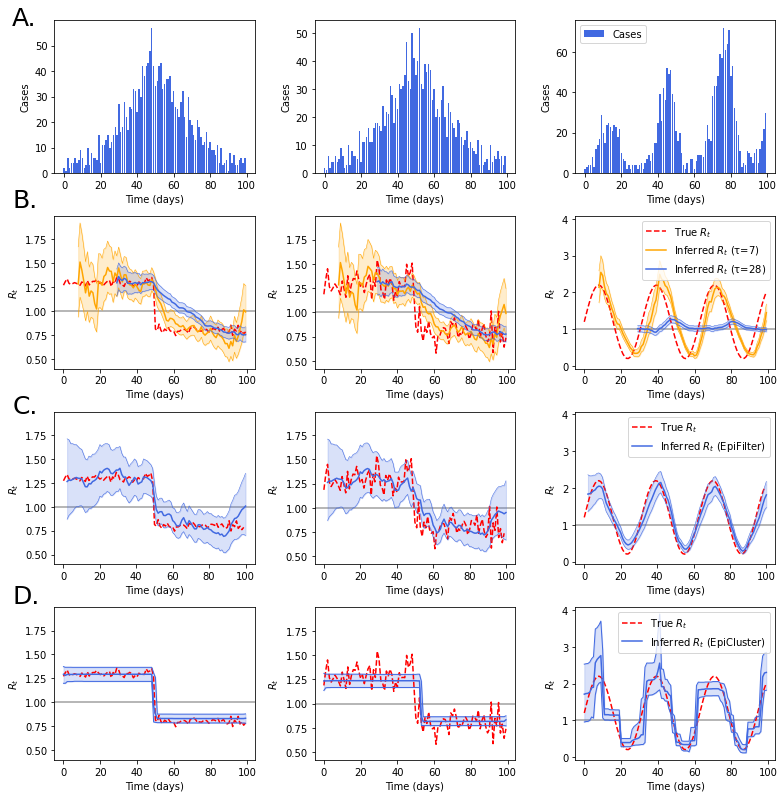

In [7]:
fig = plt.figure(figsize=(11,11))

num_exps = 3

for i in range(num_exps):
    
    do_legend = i==num_exps-1
    
    if i == 0:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth1
    elif i == 1:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth2
    elif i == 2:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth3
        
    ax = fig.add_subplot(4, num_exps, 1+i)

    x = np.arange(len(cases))
    ax.bar(x, cases, label='Cases', color='royalblue')

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Cases')

    ax = fig.add_subplot(4, num_exps, 3*num_exps+i+1)
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//4:], z_chain[num_mcmc//4:]):
        Rs.append([phi[zi] for zi in z])
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')
    ax.plot(x, np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x, np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x, np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x, np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    
    if do_legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')

    ax = fig.add_subplot(4, num_exps, num_exps+i+1, sharey=ax)
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')

    x = np.arange(8, len(cases))
    ax.plot(x, intervals7['Mean'][len(w):], color='orange', label='Inferred $R_t$ (τ=7)')
    ax.fill_between(x, intervals7['Lower bound CI'][len(w):], intervals7['Upper bound CI'][len(w):], alpha=0.2, color='orange')
    ax.plot(x, intervals7['Lower bound CI'][len(w):], color='orange', lw=0.5)
    ax.plot(x, intervals7['Upper bound CI'][len(w):], color='orange', lw=0.5)
    
    x = np.arange(29, len(cases))
    ax.plot(x, intervals28['Mean'][len(w):], color='royalblue', label='Inferred $R_t$ (τ=28)')
    ax.fill_between(x, intervals28['Lower bound CI'][len(w):], intervals28['Upper bound CI'][len(w):], alpha=0.2, color='royalblue')
    ax.plot(x, intervals28['Lower bound CI'][len(w):], color='royalblue', lw=0.5)
    ax.plot(x, intervals28['Upper bound CI'][len(w):], color='royalblue', lw=0.5)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    
    
    
    ax = fig.add_subplot(4, num_exps, 2*num_exps+i+1, sharey=ax)
    
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')


    x = epi_results['day'][1:]
    mean = epi_results['R_smooth'][1:]
    lb = epi_results['R_smooth_lower_bound'][1:]
    ub = epi_results['R_smooth_upper_bound'][1:]
    ax.plot(x, mean, color='royalblue', label='Inferred $R_t$ (EpiFilter)')
    ax.fill_between(x, lb, ub, alpha=0.2, color='royalblue')
    ax.plot(x, lb, color='royalblue', lw=0.5)
    ax.plot(x, ub, color='royalblue', lw=0.5)  
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    

fig.set_tight_layout(True)

plt.subplots_adjust(left=0.2)
fig.text(.02, .98, 'A.', fontsize=25)
fig.text(.02, .75, 'B.', fontsize=25)
fig.text(.02, .49, 'C.', fontsize=25)
fig.text(.02, .25, 'D.', fontsize=25)

plt.savefig('../notebooks/Figure3.pdf')
plt.show()
